In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns

In [47]:
conn=sqlite3.connect('../../db/proyectomacro.db')
df_pbi=pd.read_sql_query('SELECT año, pib_real_base_1990 FROM pib_real_gasto where año>1955',conn)
df_precios_minerales=pd.read_sql_query('SELECT año,zinc,estaño,plata,oro FROM precio_oficial_minerales where año>1955 and año<2024',conn)
df_precios_petroleo=pd.read_sql_query('SELECT año,precio FROM precio_petroleo_wti',conn)
df_exportacion_gas_natural=pd.read_sql_query('SELECT año,monto,toneladas FROM exportacion_gas_natural',conn)
df_tasa_de_crecimiento_pib=pd.read_sql_query('SELECT año,crecimiento FROM tasa_crecimiento_pib',conn)
#establecer año como index para todas las graficas
df_pbi.set_index('año',inplace=True)
df_precios_minerales.set_index('año',inplace=True)
df_precios_petroleo.set_index('año',inplace=True)
df_exportacion_gas_natural.set_index('año',inplace=True)
df_tasa_de_crecimiento_pib.set_index('año',inplace=True)
conn.close()

Text(0.5, 1.0, 'Correlación 2006-2023')

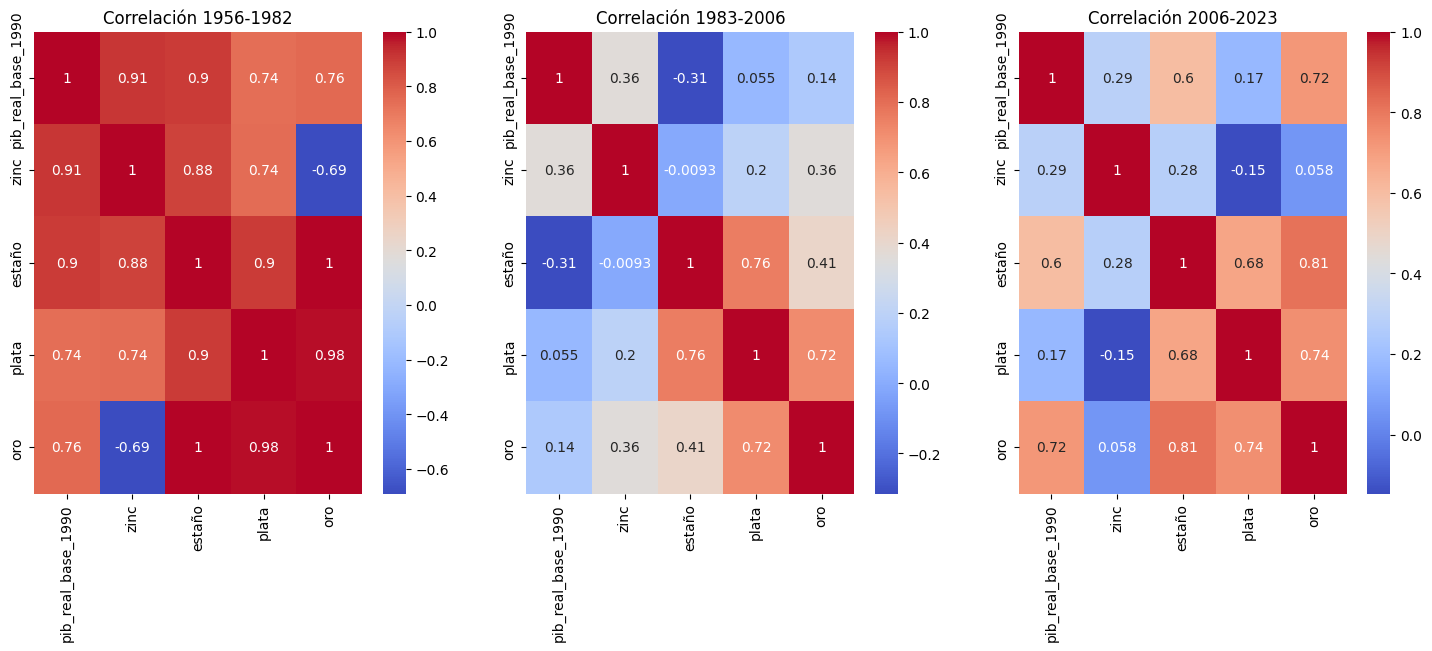

In [48]:
# Combinar ambos DataFrames usando el campo "año"
df = pd.merge(df_pbi, df_precios_minerales, on='año', how='inner')
df_1=df.loc[:1982]
df_2=df.loc[1983:2006]
df_3=df.loc[2006:]
# Calcular la matriz de correlación
correlation_matrix1 = df_1[['pib_real_base_1990', 'zinc', 'estaño','plata','oro']].corr()
correlation_matrix2 = df_2[['pib_real_base_1990', 'zinc', 'estaño','plata','oro']].corr()
correlation_matrix3 = df_3[['pib_real_base_1990', 'zinc', 'estaño','plata','oro']].corr()

# Crear subplots para las matrices de correlación
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar la matriz de correlación para el primer subplot
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlación 1956-1982')

# Graficar la matriz de correlación para el segundo subplot
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlación 1983-2006')

# Graficar la matriz de correlación para el tercer subplot
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', ax=axes[2])
axes[2].set_title('Correlación 2006-2023')

            

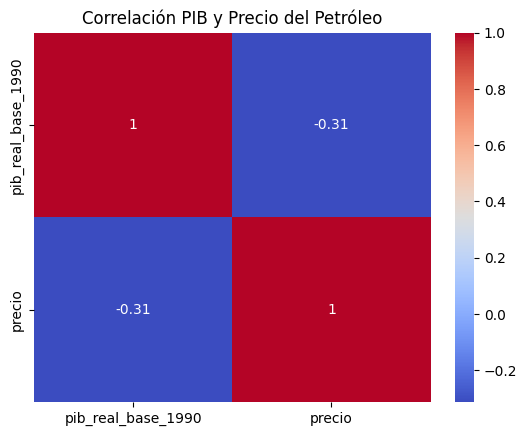

In [50]:
#correlacion petroleo y pib
df_petroleo=pd.merge(df_pbi,df_precios_petroleo,on='año',how='inner')
df_petroleo=df_petroleo.loc[2006:]
#correlacion petroleo y pib
correlation_matrix_petroleo = df_petroleo[['pib_real_base_1990', 'precio']].corr()
#graficar correlacion petroleo y pib
sns.heatmap(correlation_matrix_petroleo, annot=True, cmap='coolwarm')
plt.title('Correlación PIB y Precio del Petróleo')
plt.show()

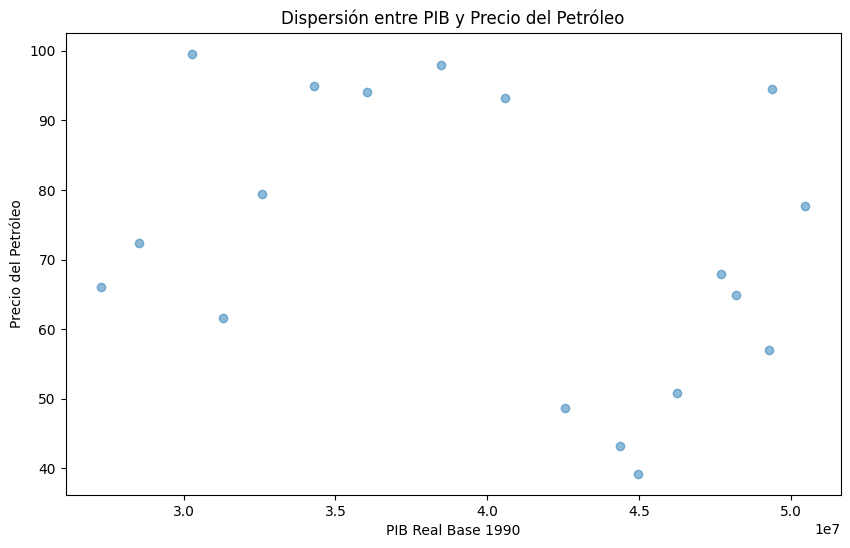

In [51]:
#grafica de dispercion entre pib y precio del petroleo
plt.figure(figsize=(10, 6))
plt.scatter(df_petroleo['pib_real_base_1990'], df_petroleo['precio'], alpha=0.5)
plt.xlabel('PIB Real Base 1990')
plt.ylabel('Precio del Petróleo')
plt.title('Dispersión entre PIB y Precio del Petróleo')
plt.show()

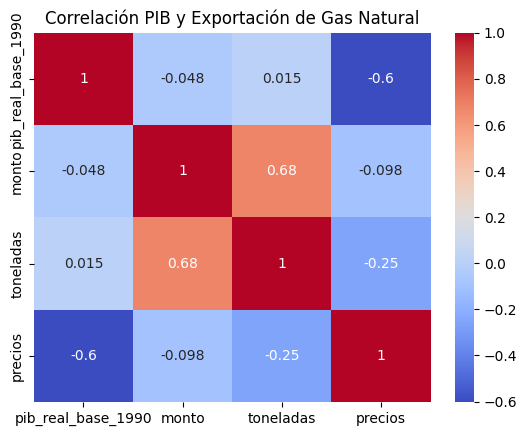

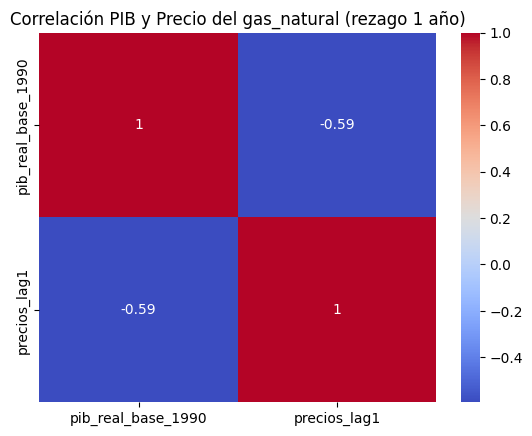

In [53]:
df_gas_natural=pd.merge(df_pbi,df_exportacion_gas_natural,on='año',how='inner')

df_gas_natural=df_gas_natural.loc[2006:]
df_gas_natural['precios'] = [
    6.72, 6.98, 8.86, 3.95, 4.39, 4.00, 2.75, 3.72, 4.37,
    2.61, 2.49, 2.96, 3.16, 2.57, 2.01, 3.85, 6.37, 2.54
]
df_gas_natural['precios_lag1']=df_gas_natural['precios'].shift(1)
df_gas_natural
#correlacion gas natural y pib
correlation_matrix_gas_natural = df_gas_natural[['pib_real_base_1990', 'monto', 'toneladas','precios']].corr()
#graficar correlacion gas natural y pib
sns.heatmap(correlation_matrix_gas_natural, annot=True, cmap='coolwarm')
plt.title('Correlación PIB y Exportación de Gas Natural')
plt.show()# Crear variable de precio del petróleo con un rezago de 1 año
df_petroleo['precio_lag1'] = df_petroleo['precio'].shift(1)

# Calcular la correlación entre el PIB y el precio del petróleo rezagado
correlation_matrix_gas_lag = df_gas_natural[['pib_real_base_1990', 'precios_lag1']].corr()

# Graficar la matriz de correlación
sns.heatmap(correlation_matrix_gas_lag, annot=True, cmap='coolwarm')
plt.title('Correlación PIB y Precio del gas_natural (rezago 1 año)')
plt.show()



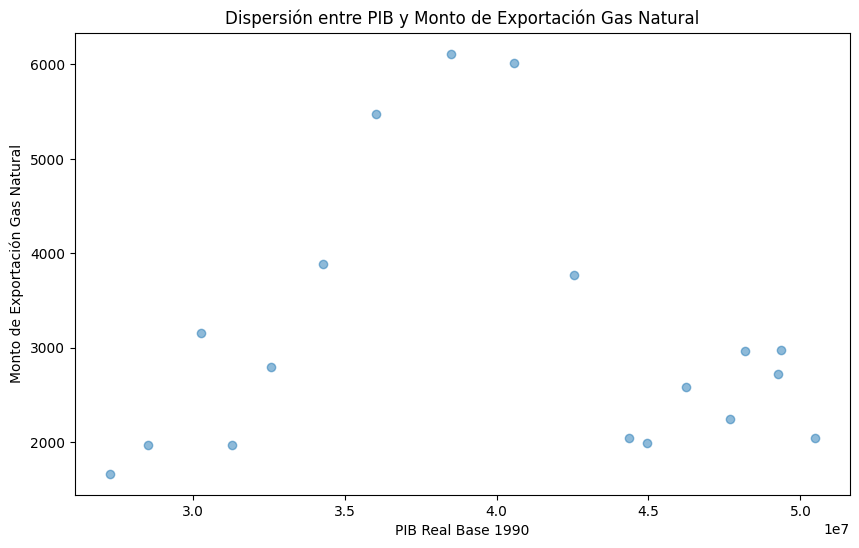

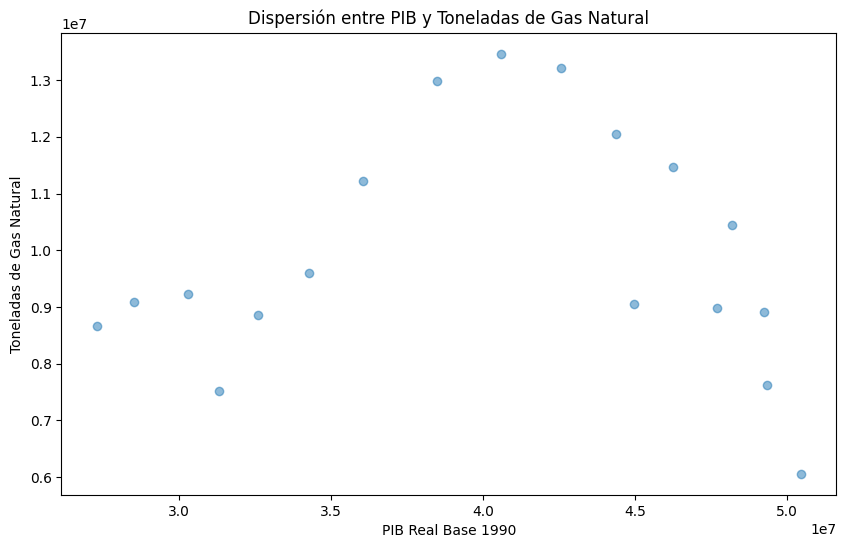

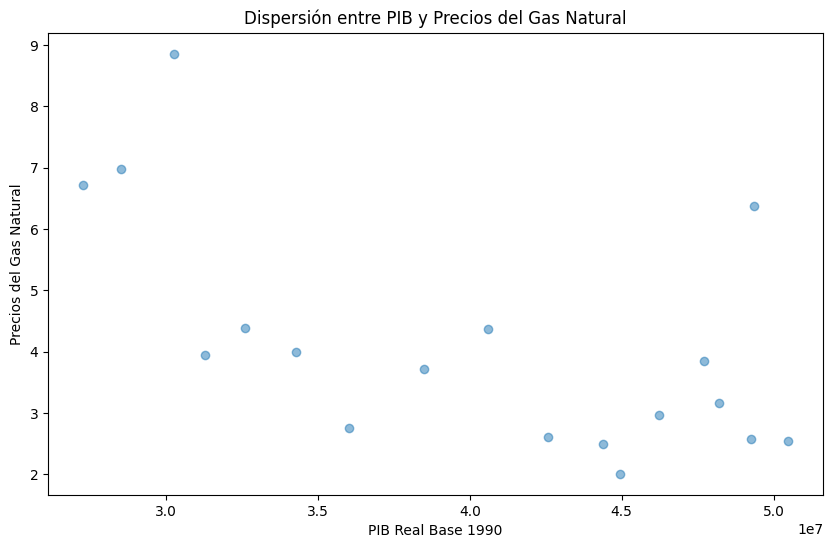

In [55]:
#grafica de dispercion
plt.figure(figsize=(10, 6))
plt.scatter(df_gas_natural['pib_real_base_1990'], df_gas_natural['monto'], alpha=0.5)
plt.xlabel('PIB Real Base 1990')
plt.ylabel('Monto de Exportación Gas Natural')
plt.title('Dispersión entre PIB y Monto de Exportación Gas Natural')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_gas_natural['pib_real_base_1990'], df_gas_natural['toneladas'], alpha=0.5)
plt.xlabel('PIB Real Base 1990')
plt.ylabel('Toneladas de Gas Natural')
plt.title('Dispersión entre PIB y Toneladas de Gas Natural')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_gas_natural['pib_real_base_1990'], df_gas_natural['precios'], alpha=0.5)
plt.xlabel('PIB Real Base 1990')
plt.ylabel('Precios del Gas Natural')
plt.title('Dispersión entre PIB y Precios del Gas Natural')
plt.show()

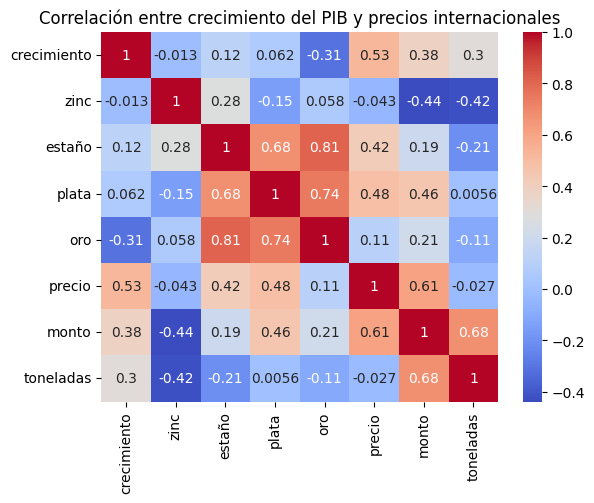

In [62]:
#todos los df concatenados con loc desde 2006
df_total = pd.concat([
    df_tasa_de_crecimiento_pib.loc[2006:],       # crecimiento PIB
    df_precios_minerales.loc[2006:],             # precios zinc, estaño, plata, oro
    df_precios_petroleo.loc[2006:],              # precio petróleo
    df_exportacion_gas_natural.loc[2006:]        # monto y toneladas gas
], axis=1, join='inner')  # 'inner' asegura que solo queden años comunes
#correlacion crecimiento precio petroleo y pib
# Matriz de correlación
correlacion_total = df_total.corr()

# Graficar
sns.heatmap(correlacion_total, annot=True, cmap='coolwarm')
plt.title('Correlación entre crecimiento del PIB y precios internacionales')
plt.show()